In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv("Mall_data2.csv")
X=pd.read_csv("Mall_data3.csv")

In [39]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [40]:
X

,Unnamed: 0,Gender,Age,Annual_Income,Score
0,0,1,19,15,39
1,1,1,21,15,81
2,2,0,20,16,6
3,3,0,23,16,77
4,4,0,31,17,40
...,...,...,...,...,...
195,195,0,35,120,79
196,196,0,45,126,28
197,197,1,32,126,74
198,198,1,32,137,18


In [41]:
X.drop(["Unnamed: 0"], axis=1, inplace=True)
display(X)

,Gender,Age,Annual_Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Plotting the silhuette score in a function of number clusters is a good way to choose clusters

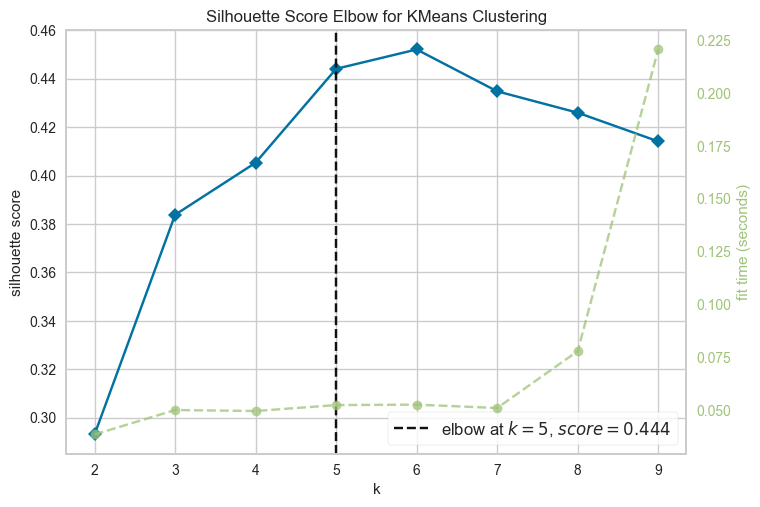

In [42]:
km=KMeans(random_state=17)
viz=KElbowVisualizer(km, k=(2, 10), metric='silhouette')
viz.fit(X)
viz.show()
plt.show()


From the plot above, 5 clusters seem to be the best fit for the model.

In [43]:
# Cluster = 5

k_model = KMeans(n_clusters=5, random_state=17, init="k-means++")
k_model.fit(X)
print(k_model.labels_)

pred = k_model.predict(X)
sil_score=silhouette_score(X, pred)
print("Silhouette Score  of 5 clusters:", sil_score)

km_5=df.copy()
km_5.loc[:, 'Cluster']=k_model.labels_

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
Silhouette Score  of 5 clusters: 0.4440669204743008


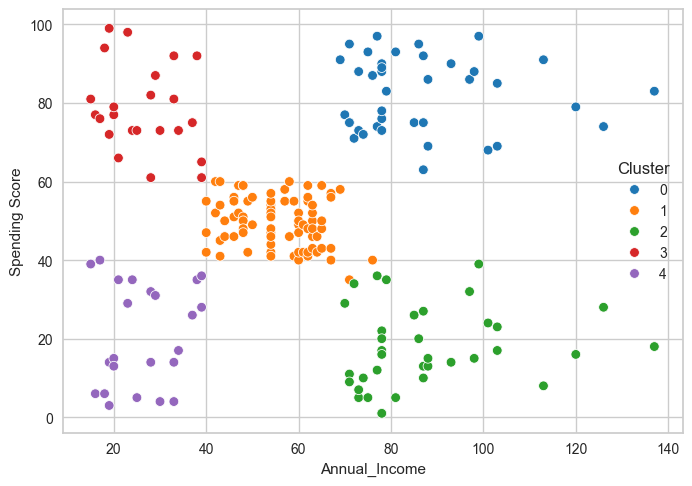

In [44]:
sns.scatterplot(x = "Annual_Income", y = 'Score', data = km_5, hue = 'Cluster', legend = 'full', palette = 'tab10')
plt.ylabel("Spending Score")
plt.show()


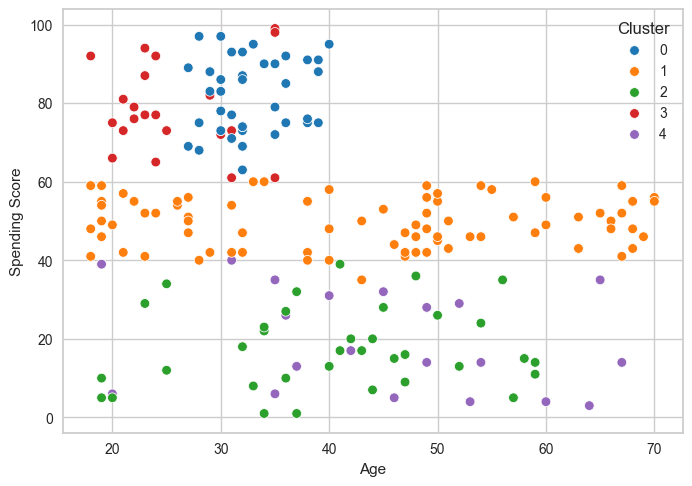

In [45]:
sns.scatterplot(x = "Age", y = "Score", data = km_5, hue = "Cluster", legend = 'full', palette = "tab10")
plt.ylabel("Spending Score")
plt.show()

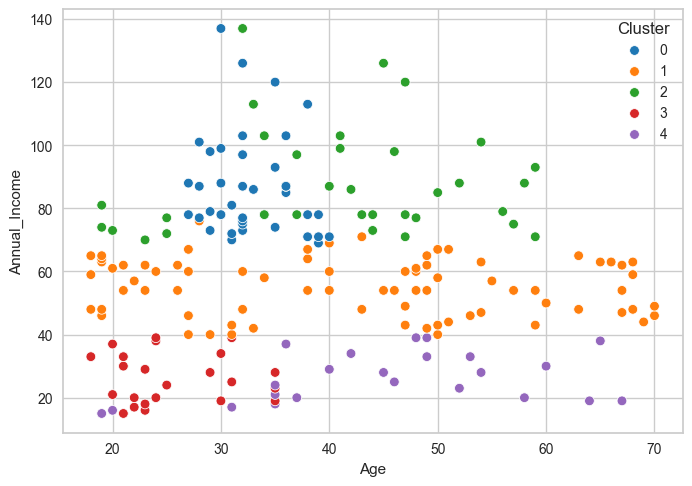

In [46]:
sns.scatterplot(x = "Age", y = "Annual_Income", data = km_5, hue = "Cluster", legend = 'full', palette = "tab10")
plt.ylabel("Annual_Income")
plt.show()

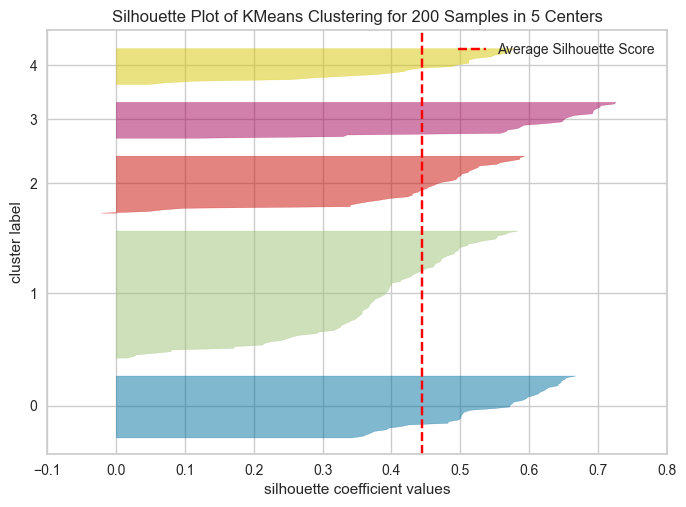

In [47]:
model = KMeans(n_clusters = 5, random_state=17)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()

In [48]:
cluster_size=km_5.groupby("Cluster").size().to_frame()
cluster_size.columns=["Cluster Size"]
cluster_size

,Cluster Size
Cluster,
0,39
1,79
2,36
3,23
4,23


In [49]:
fig = px.scatter_3d(km_5, x = "Age", y = "Annual_Income", z = "Score", color = 'Cluster', opacity = 0.7 );
fig.show()


The KMeans algorithm resulted in 5 distinct customer segments with unique characteristics and a silhouette score of 0.44. 

from the plot above;

* cluster1[blue] - consists of young, high income customers with high spending score.
* cluster2[orange] - consists of young, low income customers with high spending score.
* cluster3[purple] - consists of both young and old, average imcome customers with average spending score.
* cluster4[red] - consists of both young and old, high income customers with low spending score.
* cluster5[yellow] - consists of old, low income customers with low spending score.

